# Intro to text with the IMDB set of reviews, and Reuters News clippings

This is an introduction to classification with the Internet Movie Data Base (IMDB) which is example database of movie
reviews packaged with Keras

See "Deep Learning with Python, 2nd Edition" Francois Chollet, Chapter 4

In this case, the reviews have been reduced from words into sequences of integers, where each word is assigned an integer value

We will load the data, and one hot encode it into a "bag of words" form and then try to classify the revues



In [1]:
import pandas as pd
import numpy as np

The vocabulary that allows conversion from words to numbers or back,  is in order of most frequenct word usage,  we will load only the first 10k words used (by frequency),  dropping
less frequently used words

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

What do these fragments of text look like?

In [3]:
train_data[0][0:15]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

decode the numbers, to get back to the text

In [6]:
word_index_imdb = imdb.get_word_index()

reverse_word_index_imdb = dict(
    [(value, key) for (key, value) in word_index_imdb.items()])



decoded_rev = " ".join(
    [reverse_word_index_imdb.get(i) for i in train_data[1]])

In [7]:
decoded_rev

"the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them"

This looks really odd, I'm hoping it has been shuffled??

Ah, we did limit the vocabulary to 10K words, so there are a lot of eliminate words.

In [8]:
# zero values are negative reviews,   ones are positive reviews
train_labels[0]

1

In [9]:
#check the highest word number code

max([max(sequence) for sequence in train_data])

9999

Now vectorize the sentences, using presence/absence dummy coding of the words

This is a "bag of words" model in which all the sequence of words is lost (so much for sentence structure...)

In [10]:
# create a function to turn the lists of integers into vectors or rows in a matrix
# notice this is an np array

def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.                        
    return results

x_train = vectorize_sequences(train_data)             
x_test = vectorize_sequences(test_data) 

In [11]:
x_train[0,0:100]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [12]:
# vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [13]:
from tensorflow import keras 
from tensorflow.keras import layers
  
model = keras.Sequential([
    layers.Dense(24, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
# set up for validation 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.4943 - accuracy: 0.7903 - val_loss: 0.3665 - val_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2920 - accuracy: 0.9042 - val_loss: 0.3251 - val_accuracy: 0.8675
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2149 - accuracy: 0.9260 - val_loss: 0.3362 - val_accuracy: 0.8624
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1681 - accuracy: 0.9449 - val_loss: 0.3042 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1354 - accuracy: 0.9573 - val_loss: 0.2875 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1139 - accuracy: 0.9641 - val_loss: 0.2989 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0872 - accuracy: 0.9745 - val_loss: 0.3143 - val_accuracy: 0.8829
Epoch 8/20
30

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

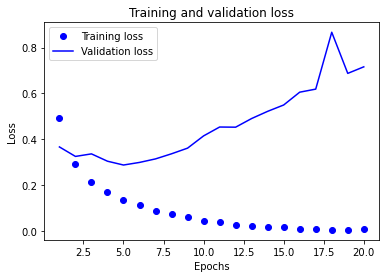

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

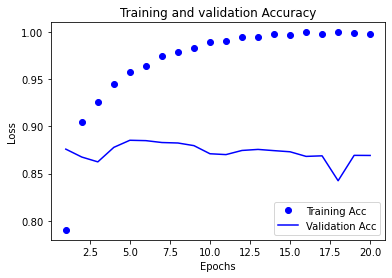

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, "bo", label="Training Acc")        
plt.plot(epochs, val_acc_values, "b", label="Validation Acc")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
# retrain on the whole data set,  added some regularizers

from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu",bias_regularizer=regularizers.l2(1e-4)),
    layers.Dense(16, activation="relu",bias_regularizer=regularizers.l2(1e-3)),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=512)
print()


Epoch 1/10
49/49 [==============================] - 1s 9ms/step - loss: 0.4443 - accuracy: 0.8271: 0s - loss: 0.5051 - accuracy
Epoch 2/10
49/49 [==============================] - 0s 8ms/step - loss: 0.2559 - accuracy: 0.9085: 0s - loss: 0.2658 - accu
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1978 - accuracy: 0.9299
Epoch 4/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1679 - accuracy: 0.9403
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1434 - accuracy: 0.9504
Epoch 6/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1255 - accuracy: 0.9563
Epoch 7/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1140 - accuracy: 0.9600: 0s - loss: 0.1149 - accuracy: 
Epoch 8/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1005 - accuracy: 0.9659: 0s - loss: 0.1009 - accu
Epoch 9/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0906 - accuracy: 0.9690
Epo

In [26]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4510 - accuracy: 0.8612


In [ ]:
Question/Action

Alter the number of words used, try 15k or 20k

Do the sentences look more reasonable?  What happens to the classification performance?

# Reuters data set-  Multiple classes

More classification of text,  this time there are 46 categories of different types of news articles

These are short news clips

Again, restrict the data to the first 10k words in the dictionary

In [27]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [28]:
train_data.shape

(8982,)

In [29]:
# converting from numbers back to words

# the word index uses the word as a key and the value is the index of the word

word_index = reuters.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# I don't understand why there is a offset of i-3 here...

decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [30]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'


What are the low numbered words?

In [31]:
reverse_word_index[3]

'to'

In [32]:
reverse_word_index[4]

'in'

In [33]:
reverse_word_index[1]

'the'

In [34]:
reverse_word_index.get(11400,"?")

'wrightson'

In [35]:
# use the vectorize sequence created earlier

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [36]:
# one hot encoding of the labels,  done with a loop

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

y_train = to_one_hot(train_labels)     
y_test = to_one_hot(test_labels)  

In [37]:
# Alternative approach, using a built in keras function

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [38]:
## define the model

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [39]:
#compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [40]:
# set up for validation

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [41]:
#train the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.5840 - accuracy: 0.5368 - val_loss: 1.7059 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3793 - accuracy: 0.7048 - val_loss: 1.3005 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0320 - accuracy: 0.7761 - val_loss: 1.1319 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8131 - accuracy: 0.8281 - val_loss: 1.0475 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6539 - accuracy: 0.8647 - val_loss: 0.9670 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5203 - accuracy: 0.8946 - val_loss: 0.9703 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4258 - accuracy: 0.9104 - val_loss: 0.9233 - val_accuracy: 0.8140
Epoch 8/20
16

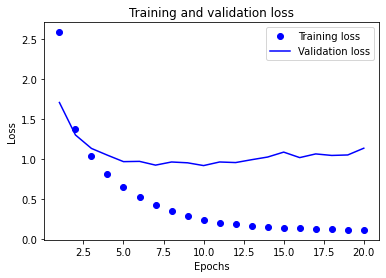

In [42]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

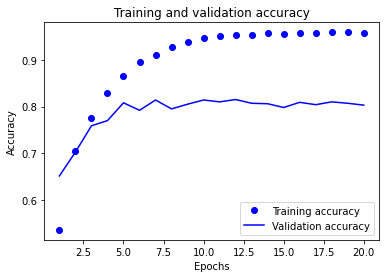

In [43]:
plt.clf()                          
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 8ms/step - loss: 2.4148 - accuracy: 0.5524
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.2849 - accuracy: 0.7218
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 0.9613 - accuracy: 0.7961
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7549 - accuracy: 0.8434: 0s - loss: 0.7594 - accuracy: 0.84
Epoch 5/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5902 - accuracy: 0.8765
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4717 - accuracy: 0.9012
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3786 - accuracy: 0.9203
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3073 - accuracy: 0.9338
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.7996


In [45]:
results

[0.9730163812637329, 0.7996438145637512]

#Question/Action

Try a regularization method and see if you can improve the performance of the reuters model

#Question/Action

Reduce the Reuters model to 2k words and see what happens to the performance of the model

In [47]:
%load_ext watermark
%watermark

Last updated: 2022-03-27T15:33:29.584292-04:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.1.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 13, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [48]:
%watermark --iversions

matplotlib: 3.5.1
pandas    : 1.4.1
numpy     : 1.21.5
tensorflow: 2.6.0

